In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pandas as pd

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(housing.data, housing.target, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5245109352606162

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X_iris_full, X_iris_test, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
X_iris_train, X_iris_valid, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter = 10_000,random_state=42)
pipeline_clf = make_pipeline(StandardScaler(), mlp_clf)
pipeline_clf.fit(X_iris_train, y_iris_train)
y_pred = pipeline_clf.predict(X_iris_test)
accuracy_score(y_iris_test, y_pred)

1.0

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0 # Scaling from 0-255 to 0-1

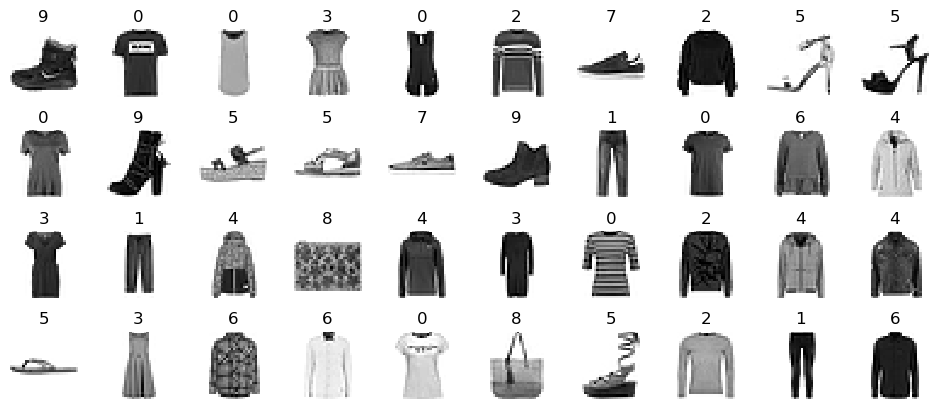

In [6]:
n_rows = 4 
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
class_names = ["T-shirt/top", "Pants", "Pullover", "Dress", "Jacket", "Sandal", "Shirt", "Sneaker","Bag", "Boot"]

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


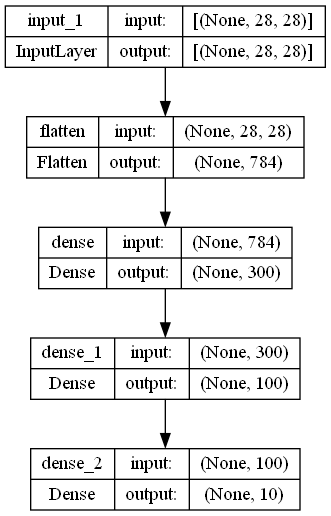

In [10]:
tf.keras.utils.plot_model(model)
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [11]:
model.layers

In [12]:
output_layer = model.get_layer('dense_2')
weights, biases = output_layer.get_weights()
weights

array([[-1.76296234e-01, -1.31797791e-01, -8.57959539e-02,
         8.32941234e-02,  5.91413081e-02, -3.81499231e-02,
         1.01858824e-01, -3.20160985e-02, -2.24380761e-01,
         1.47315413e-01],
       [ 9.28364396e-02,  1.16917342e-02, -1.03945524e-01,
        -2.05087364e-02,  1.12673551e-01, -9.23985690e-02,
         1.33539259e-01,  1.88593060e-01, -2.09037960e-03,
         1.07091874e-01],
       [ 7.90501833e-02, -1.57693416e-01, -2.10371032e-01,
         1.30511731e-01,  7.56264627e-02, -1.63558781e-01,
         1.12246126e-02, -1.54293492e-01,  5.26507795e-02,
         1.97022021e-01],
       [ 1.54490173e-01,  1.74794704e-01,  3.17730904e-02,
         2.32843697e-01,  1.62651122e-01, -1.47443742e-01,
        -1.60179019e-01, -2.77393907e-02,  1.01158321e-01,
         2.25020170e-01],
       [-2.05146000e-01, -1.58936188e-01,  1.06885672e-01,
        -5.91491610e-02,  1.05865747e-01,  1.55935109e-01,
         5.97577691e-02,  1.70831174e-01,  2.29018778e-01,
         1.

In [13]:
print(weights.shape)
print(biases.shape)

(100, 10)
(10,)


In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7205 - accuracy: 0.7602 - val_loss: 0.5084 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4917 - accuracy: 0.8289 - val_loss: 0.4626 - val_accuracy: 0.8344
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4434 - accuracy: 0.8440 - val_loss: 0.4266 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4179 - accuracy: 0.8543 - val_loss: 0.3999 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3965 - accuracy: 0.8602 - val_loss: 0.3909 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3793 - accuracy: 0.8654 - val_loss: 0.3934 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3668 - accuracy: 0.8696 - val_loss: 0.3731 - val_accuracy:

In [17]:
print(history.params)
print(history.epoch)
pd.DataFrame(history.history).head(2)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


,loss,accuracy,val_loss,val_accuracy
0,0.720473,0.760200,0.508442,0.8284
1,0.491698,0.828909,0.462593,0.8344


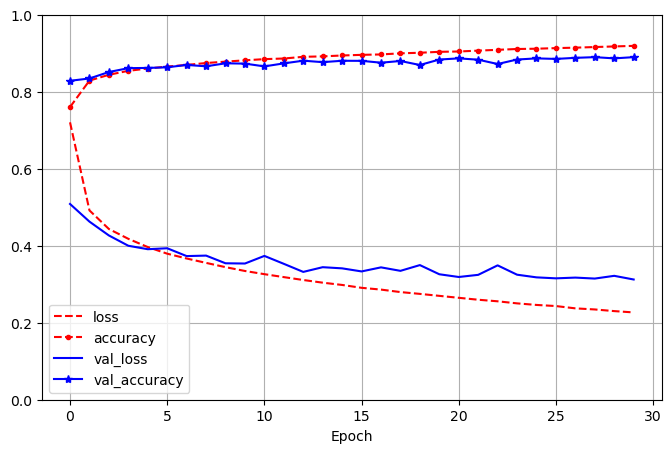

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5), ylim=[0,1], grid=True, xlabel="Epoch", style=['r--', 'r--.', 'b-','b-*'])
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 697us/step - loss: 0.3229 - accuracy: 0.8841


[0.3228803873062134, 0.8841000199317932]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 42ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

prediction:  ['Boot', 'Pullover', 'Pants']


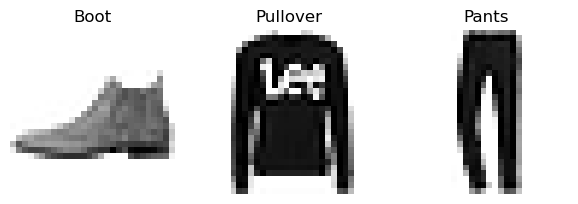

In [21]:
plt.figure(figsize=(7.2, 2.4))
y_pred = y_proba.argmax(axis=-1)
print("prediction: ", [class_names[y] for y in y_pred])
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 8.5874 - root_mean_squared_error: 2.9305 - val_loss: 8.4193 - val_root_mean_squared_error: 2.9018
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.3095 - root_mean_squared_error: 2.8826 - val_loss: 8.3938 - val_root_mean_squared_error: 2.8974
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2889 - root_mean_squared_error: 2.8791 - val_loss: 8.3976 - val_root_mean_squared_error: 2.8980
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2808 - root_mean_squared_error: 2.8776 - val_loss: 8.4583 - val_root_mean_squared_error: 2.9084
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2722 - root_mean_squared_error: 2.8762 - val_loss: 8.3922 - val_root_mean_squared_error: 2.8972
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2616 - root_mean_squared_error: 2.8743 - val_loss: 8

In [23]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [24]:
normalizating_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalizating_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [25]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["RootMeanSquaredError"])
normalizating_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.0344 - root_mean_squared_error: 1.0171 - val_loss: 0.6720 - val_root_mean_squared_error: 0.8198
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4266 - root_mean_squared_error: 0.6532 - val_loss: 0.7768 - val_root_mean_squared_error: 0.8813
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3888 - root_mean_squared_error: 0.6235 - val_loss: 0.3723 - val_root_mean_squared_error: 0.6102
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3762 - root_mean_squared_error: 0.6133 - val_loss: 1.1588 - val_root_mean_squared_error: 1.0765
Epoch 5/30
363/363 [==============================] - 0s 672us/step - loss: 0.3624 - root_mean_squared_error: 0.6020 - val_loss: 0.9838 - val_root_mean_squared_error: 0.9919
Epoch 6/30
363/363 [==============================] - 0s 566us/step - loss: 0.3598 - root_mean_squared_error: 0.5999 - val_loss: 0.7457 - 

array([[0.5139618],
       [1.299992 ],
       [4.3376064]], dtype=float32)

In [26]:
#input layer
input_wide =tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
#normalization layer
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
#rest of the deep layers for input_deep
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Output layer w/ concat on wide and deep layer
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [27]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_train_wide[:3], X_train_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))
print(f'mse_test: {mse_test}')
y_pred

Epoch 1/20
363/363 [==============================] - 1s 787us/step - loss: 1.8400 - root_mean_squared_error: 1.3565 - val_loss: 0.9418 - val_root_mean_squared_error: 0.9704
Epoch 2/20
363/363 [==============================] - 0s 605us/step - loss: 0.5628 - root_mean_squared_error: 0.7502 - val_loss: 0.8173 - val_root_mean_squared_error: 0.9040
Epoch 3/20
363/363 [==============================] - 0s 632us/step - loss: 0.4591 - root_mean_squared_error: 0.6776 - val_loss: 0.4380 - val_root_mean_squared_error: 0.6618
Epoch 4/20
363/363 [==============================] - 0s 605us/step - loss: 0.4229 - root_mean_squared_error: 0.6503 - val_loss: 0.3993 - val_root_mean_squared_error: 0.6319
Epoch 5/20
363/363 [==============================] - 0s 607us/step - loss: 0.4111 - root_mean_squared_error: 0.6412 - val_loss: 0.4642 - val_root_mean_squared_error: 0.6813
Epoch 6/20
363/363 [==============================] - 0s 598us/step - loss: 0.3984 - root_mean_squared_error: 0.6312 - val_loss: 0

array([[3.222129 ],
       [1.9133552],
       [2.2298853]], dtype=float32)

In [29]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()

norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Using multiple outputs in 1 layer
output = tf.keras.layers.Dense(1)(concat)
output_aux = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, output_aux])

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9,0.1), optimizer=optimizer, metrics=['RootMeanSquaredError'])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')        

Epoch 1/20
363/363 [==============================] - 1s 978us/step - loss: 1.4942 - dense_2_loss: 1.3741 - dense_3_loss: 2.5748 - dense_2_root_mean_squared_error: 1.1722 - dense_3_root_mean_squared_error: 1.6046 - val_loss: 1.1226 - val_dense_2_loss: 0.7278 - val_dense_3_loss: 4.6756 - val_dense_2_root_mean_squared_error: 0.8531 - val_dense_3_root_mean_squared_error: 2.1623
Epoch 2/20
363/363 [==============================] - 0s 753us/step - loss: 0.5469 - dense_2_loss: 0.5123 - dense_3_loss: 0.8578 - dense_2_root_mean_squared_error: 0.7158 - dense_3_root_mean_squared_error: 0.9262 - val_loss: 0.7338 - val_dense_2_loss: 0.5471 - val_dense_3_loss: 2.4149 - val_dense_2_root_mean_squared_error: 0.7396 - val_dense_3_root_mean_squared_error: 1.5540
Epoch 3/20
363/363 [==============================] - 0s 740us/step - loss: 0.4622 - dense_2_loss: 0.4428 - dense_3_loss: 0.6365 - dense_2_root_mean_squared_error: 0.6654 - dense_3_root_mean_squared_error: 0.7978 - val_loss: 0.5541 - val_dense_

In [31]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

1/1 [==============================] - 0s 33ms/step
main guesses: [3.0822618, 1.8903599, 2.6130211]
aux guesses: [2.966102, 2.0702152, 2.6499147]
actual: [1.442, 1.687, 1.621]


In [32]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 9ms/step


{'dense_2': array([[3.0822618],
        [1.8903599],
        [2.6130211]], dtype=float32),
 'dense_3': array([[2.966102 ],
        [2.0702152],
        [2.6499147]], dtype=float32)}

In [33]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation='relu', name="Subclass_model") 

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 [==============================] - 1s 988us/step - loss: 1.3743 - output_1_loss: 1.3382 - output_2_loss: 1.6996 - output_1_root_mean_squared_error: 1.1568 - output_2_root_mean_squared_error: 1.3037 - val_loss: 0.7317 - val_output_1_loss: 0.6037 - val_output_2_loss: 1.8839 - val_output_1_root_mean_squared_error: 0.7770 - val_output_2_root_mean_squared_error: 1.3725
Epoch 2/10
363/363 [==============================] - 0s 712us/step - loss: 0.5455 - output_1_loss: 0.5327 - output_2_loss: 0.6609 - output_1_root_mean_squared_error: 0.7299 - output_2_root_mean_squared_error: 0.8129 - val_loss: 1.0824 - val_output_1_loss: 0.9428 - val_output_2_loss: 2.3386 - val_output_1_root_mean_squared_error: 0.9710 - val_output_2_root_mean_squared_error: 1.5292
Epoch 3/10
363/363 [==============================] - 0s 718us/step - loss: 0.4711 - output_1_loss: 0.4606 - output_2_loss: 0.5658 - output_1_root_mean_squared_error: 0.6787 - output_2_root_mean_squared_error: 0.7522 - val_loss:

In [35]:
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')  
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

weight sum of losses: 0.3561094105243683
main_loss: 0.3463667333126068, aux_loss: 0.44379332661628723
main_rmse: 0.5885292887687683, aux_rmse:0.6661781668663025
main guesses: [3.285964, 2.1703312, 2.097613]
aux guesses: [3.072951, 2.3803194, 2.0555432]
actual: [1.442, 1.687, 1.621]


In [36]:
model.save("First_Keras_model", save_format="tf")

INFO:tensorflow:Assets written to: First_Keras_model\assets


INFO:tensorflow:Assets written to: First_Keras_model\assets


In [37]:
model = tf.keras.models.load_model("First_Keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))  
print(f'main guesses: {[y[0] for y in y_pred_main]}')
print(f'aux guesses: {[y_aux[0] for y_aux in y_pred_aux]}')

1/1 [==============================] - 0s 34ms/step
main guesses: [3.285964, 2.1703312, 2.097613]
aux guesses: [3.072951, 2.3803194, 2.0555432]


In [38]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("My_checkpoint", save_weights_only=True)
histor = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3628 - output_1_loss: 0.3536 - output_2_loss: 0.4458 - output_1_root_mean_squared_error: 0.5946 - output_2_root_mean_squared_error: 0.6677 - val_loss: 0.4171 - val_output_1_loss: 0.4045 - val_output_2_loss: 0.5304 - val_output_1_root_mean_squared_error: 0.6360 - val_output_2_root_mean_squared_error: 0.7283
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3545 - output_1_loss: 0.3461 - output_2_loss: 0.4301 - output_1_root_mean_squared_error: 0.5883 - output_2_root_mean_squared_error: 0.6558 - val_loss: 0.4938 - val_output_1_loss: 0.4810 - val_output_2_loss: 0.6085 - val_output_1_root_mean_squared_error: 0.6936 - val_output_2_root_mean_squared_error: 0.7801
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3521 - output_1_loss: 0.3441 - output_2_loss: 0.4246 - output_1_root_mean_squared_error: 0.5866 - output_2_root_mean_squared_error: 0.6516 - val_loss: 0.329

In [39]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3385 - output_1_loss: 0.3320 - output_2_loss: 0.3972 - output_1_root_mean_squared_error: 0.5762 - output_2_root_mean_squared_error: 0.6303 - val_loss: 0.5455 - val_output_1_loss: 0.5327 - val_output_2_loss: 0.6606 - val_output_1_root_mean_squared_error: 0.7299 - val_output_2_root_mean_squared_error: 0.8128
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3350 - output_1_loss: 0.3289 - output_2_loss: 0.3899 - output_1_root_mean_squared_error: 0.5735 - output_2_root_mean_squared_error: 0.6245 - val_loss: 0.5677 - val_output_1_loss: 0.5633 - val_output_2_loss: 0.6068 - val_output_1_root_mean_squared_error: 0.7506 - val_output_2_root_mean_squared_error: 0.7790
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3344 - output_1_loss: 0.3284 - output_2_loss: 0.3885 - output_1_root_mean_squared_error: 0.5731 - output_2_root_mean_squared_error: 0.6233 - val_loss: 0.317

In [40]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"]/ logs["loss"]
        print(f"\nEpoch={epoch}, val/train={ratio:.2f}")

In [41]:
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[early_stopping_cb, PrintValTrainRatioCallback()])

Epoch 1/20
358/363 [============================>.] - ETA: 0s - loss: 0.3120 - output_1_loss: 0.3067 - output_2_loss: 0.3604 - output_1_root_mean_squared_error: 0.5538 - output_2_root_mean_squared_error: 0.6003
Epoch=0, val/train=1.71
363/363 [==============================] - 0s 778us/step - loss: 0.3132 - output_1_loss: 0.3078 - output_2_loss: 0.3620 - output_1_root_mean_squared_error: 0.5548 - output_2_root_mean_squared_error: 0.6017 - val_loss: 0.5362 - val_output_1_loss: 0.5331 - val_output_2_loss: 0.5639 - val_output_1_root_mean_squared_error: 0.7301 - val_output_2_root_mean_squared_error: 0.7510
Epoch 2/20
354/363 [============================>.] - ETA: 0s - loss: 0.3213 - output_1_loss: 0.3163 - output_2_loss: 0.3661 - output_1_root_mean_squared_error: 0.5624 - output_2_root_mean_squared_error: 0.6051
Epoch=1, val/train=1.62
363/363 [==============================] - 0s 740us/step - loss: 0.3199 - output_1_loss: 0.3150 - output_2_loss: 0.3647 - output_1_root_mean_squared_error:

In [42]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [44]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100,200))
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
          callbacks=tensorboard_cb)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2247 - root_mean_squared_error: 1.4915 - val_loss: 1.2092 - val_root_mean_squared_error: 1.0996
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7551 - root_mean_squared_error: 0.8690 - val_loss: 0.9646 - val_root_mean_squared_error: 0.9822
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6312 - root_mean_squared_error: 0.7945 - val_loss: 0.7482 - val_root_mean_squared_error: 0.8650
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5765 - root_mean_squared_error: 0.7593 - val_loss: 0.6210 - val_root_mean_squared_error: 0.7880
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5430 - root_mean_squared_error: 0.7369 - val_loss: 0.5264 - val_root_mean_squared_error: 0.7255
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5183 - root_mean_squared_error: 0.7199 - val_loss: 0.4925 - val_

In [45]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        
        data = (np.random.randn(100) + 2) * step/100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step/1000
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
        


In [46]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [47]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=0, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2)
    
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [48]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, overwrite=True,
                                      directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data= (X_valid, y_valid))

Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.8187999725341797

Best val_accuracy So Far: 0.8416000008583069
Total elapsed time: 00h 00m 47s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [49]:
top3_model = random_search_tuner.get_best_models(num_models=3)
best_model = top3_model[0]

In [50]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 0,
 'n_neurons': 25,
 'learning_rate': 0.004144505204619489,
 'optimizer': 'sgd'}

In [51]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 0
n_neurons: 25
learning_rate: 0.004144505204619489
optimizer: sgd
Score: 0.8416000008583069


In [52]:
best_trial.metrics.get_last_value("val_accuracy")

0.8416000008583069

In [53]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 1s 429us/step - loss: 630.9319 - accuracy: 0.7934
Epoch 2/10
1875/1875 [==============================] - 1s 436us/step - loss: 608.5848 - accuracy: 0.7966
Epoch 3/10
1875/1875 [==============================] - 1s 422us/step - loss: 603.9332 - accuracy: 0.7975
Epoch 4/10
1875/1875 [==============================] - 1s 420us/step - loss: 602.1122 - accuracy: 0.7983
Epoch 5/10
1875/1875 [==============================] - 1s 422us/step - loss: 613.0186 - accuracy: 0.7966
Epoch 6/10
1875/1875 [==============================] - 1s 433us/step - loss: 584.1722 - accuracy: 0.8027
Epoch 7/10
1875/1875 [==============================] - 1s 416us/step - loss: 590.6959 - accuracy: 0.8020
Epoch 8/10
1875/1875 [==============================] - 1s 421us/step - loss: 598.3821 - accuracy: 0.8004
Epoch 9/10
1875/1875 [==============================] - 1s 413us/step - loss: 585.3681 - accuracy: 0.8038
Epoch 10/10
313/313 [=========================

In [54]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("nomalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [55]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)

In [56]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 03s]
val_accuracy: 0.7585999965667725

Best val_accuracy So Far: 0.8432000279426575
Total elapsed time: 00h 05m 16s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [57]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt"
)
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data= (X_valid, y_valid),
                          callbacks=[early_stopping_cb, tensorboard_cb])

Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.8428000211715698

Best val_accuracy So Far: 0.8428000211715698
Total elapsed time: 00h 00m 44s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [58]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [59]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

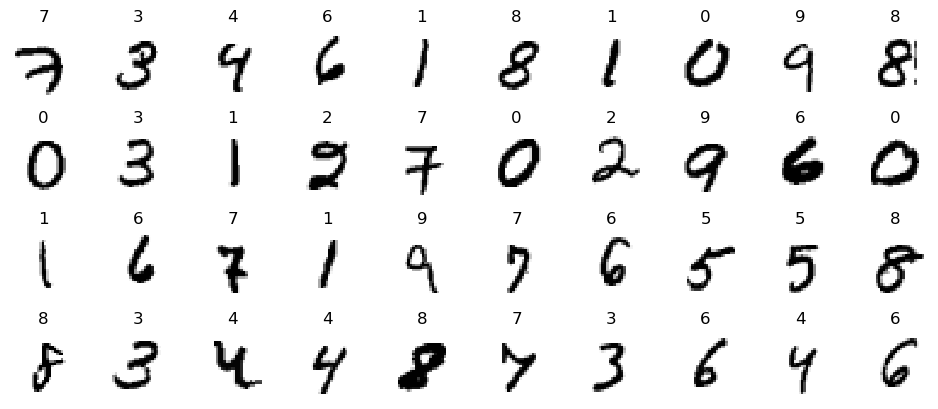

In [60]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [62]:
X_train[0].shape

(28, 28)

In [61]:
K = tf.keras.backend

class ExponentailLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [64]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [65]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
expon_lr = ExponentailLearningRate(factor=1.005)

In [67]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[expon_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: 1389526272.0000 - accuracy: 0.5894 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

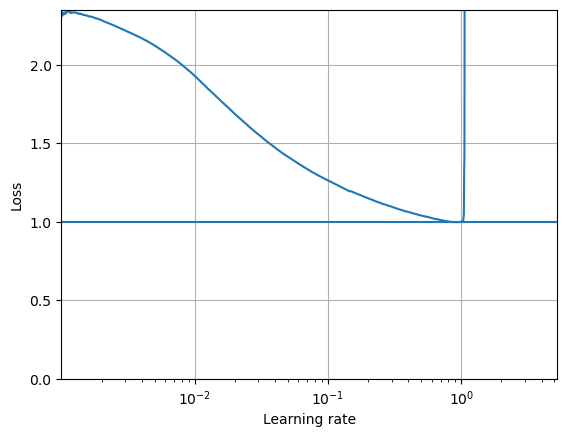

In [68]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [69]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [71]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [73]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_001')

In [74]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1684/1719 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.9269

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 3s 2ms/step - loss: 0.2324 - accuracy: 0.9274 - val_loss: 0.0996 - val_accuracy: 0.9700
Epoch 2/100
1693/1719 [============================>.] - ETA: 0s - loss: 0.0936 - accuracy: 0.9713

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 3s 2ms/step - loss: 0.0936 - accuracy: 0.9713 - val_loss: 0.0884 - val_accuracy: 0.9752
Epoch 3/100
1690/1719 [============================>.] - ETA: 0s - loss: 0.0656 - accuracy: 0.9789

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 3s 2ms/step - loss: 0.0656 - accuracy: 0.9790 - val_loss: 0.0813 - val_accuracy: 0.9750
Epoch 4/100
1706/1719 [============================>.] - ETA: 0s - loss: 0.0477 - accuracy: 0.9847

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0790 - val_accuracy: 0.9788
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.1041 - val_accuracy: 0.9734
Epoch 6/100
1683/1719 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9907

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0699 - val_accuracy: 0.9824
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0899 - val_accuracy: 0.9806
Epoch 8/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0882 - val_accuracy: 0.9814
Epoch 9/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0854 - val_accuracy: 0.9792
Epoch 10/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0809 - val_accuracy: 0.9816
Epoch 11/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0899 - val_accuracy: 0.9832
Epoch 12/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.1191 - val_accuracy: 0

In [75]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 998us/step - loss: 6.8374 - accuracy: 0.0845


[6.83743143081665, 0.08449999988079071]